## Importing Packages and .CSV

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 

#Used for data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Import .csv file
df = pd.read_csv('final_df.csv')

## Data Cleaning and EDA

In [3]:
#After importing the .csv file I changed the column names to help with readability
df = df.rename(columns={'0': 'mission', '1': 'tagline', '2': 'name', '3': 'category_name', '4': 'category_ID', '5': 'cause_name', '6': 'cause_ID', '7': 'city', '8': 'state', '9': 'zipcode', 
                   '10': 'current_score', '11': 'current_rating', '12': 'advisories', '13': 'accountability_score', '14': 'accountability_rating', '15': 'irs_org_type', '16': 'irs_classification', 
                   '17': 'npo_affiliation', '18': 'foundation_status', '19': 'irs_org_classification', '20': 'tax_deductibility', '21': 'npo_status', '22': 'org_assets', '23': 'org_income', 
                   '24': 'fin_score', '25': 'fin_rating'})

### Data Cleaning 

#### Dropping features

In [4]:
#tagline(23 null) - Dropping because we will not be doing an analysis with taglines
#irs_org_type(1906) - Check value counts and determine how important this variable is. Look at the 11 data points and either drop rows or classify as Unknown
#irs_classification(22) - Check value counts and determine how important this variable is. Look at the 11 data points and either drop rows or classify as Unknown
#irs_org_classification(1906) - Check value counts and determine how important this variable is. Look at the 11 data points and either drop rows or classify as Unknown
#mission - dropping because I will not be doing analysis with the mission
df = df.drop(columns=['tagline', 'irs_org_type', 'irs_classification',  
                      'irs_org_classification', 'mission'])

#Dropping because of value counts:
#advisories(10794 null) - Dropping because the majority of the data is missing 
#tax_deductability(9 null) - Dropping because the majority of the organizations are tax deductible
#npo_status(9 null) - Dropping because the majority of the data are the same
df = df.drop(columns=['advisories','tax_deductibility', 'npo_status']) 

#### Dealing with missing values

In [5]:
#Deleting the missing rows because the missing data isn't significant
#npo_affiliation(11) - Check value counts and determine how important this variable is. Look at the 11 data points and either drop rows or classify as Unknown
#foundation_status(9) - Check value counts and determine how important this variable is. Look at the 11 data points and either drop rows or classify as Unknown
df = df.dropna(subset=['npo_affiliation', 'foundation_status'])

#Replace missing values with the mean for org_assets and org_income
df['org_assets'] = df['org_assets'].fillna(df['org_assets'].mean())
df['org_income'] = df['org_income'].fillna(df['org_income'].mean())

## Exploratory Data Analysis 

#### Plotting organizational income to view distribution

<AxesSubplot:xlabel='org_income', ylabel='org_assets'>

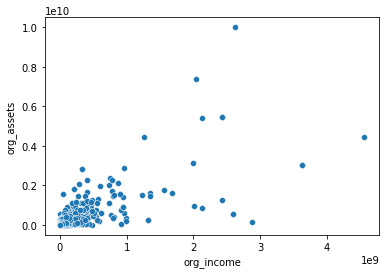

In [6]:
#Creating a scatterplot to look at the distribution of org_income
sns.scatterplot(data=df, x=df['org_income'], y=df['org_assets'])

#### Plotting organizational assets to view distribution

In [7]:
#Creating a scatterplot to look at the distribution of the org_assets

#### Financial Rating Distribution

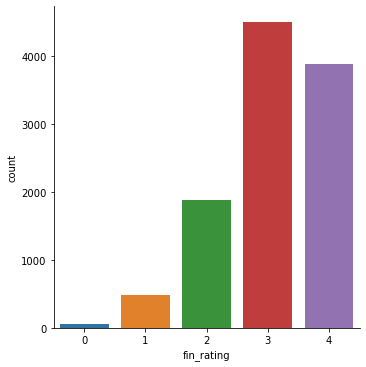

In [8]:
#fin_rating is going to be my target variable. I want to first look at the distribution of the financial ratings. 
sns.catplot(x=df['fin_rating'], kind='count', palette=None, data= df)

#### Transforming data

In [10]:
#fin_rating is our target variable and I want to say whether or not they have a low financial rating or a high financial rating. for this I've identified ratings 0-2 as low ratings 
#and 3-4 as high rightings. I've assigned 0 to be low ratings variable and 1 to be high ratings variable to make these ratings more categorical 
df['fin_rating'] = df['fin_rating'].replace([1, 2, 3, 4], [0, 0, 1, 1])

# Feature Engineering

#### Grouped states into regions

In [11]:
df['Southeast'] = (df['state'] == 'MD') | (df['state'] =='DC') | (df['state'] =='DE') | (df['state'] =='WV') | (df['state'] =='VA') | (df['state'] =='KY') | (df['state'] =='NC') | (df['state'] =='TN') | (df['state'] =='SC') | (df['state'] =='GA') | (df['state'] =='FL') | (df['state'] =='AL') | (df['state'] =='MS') | (df['state'] =='AR') | (df['state'] =='LA')
df['Southeast'] = df['Southeast'].replace([True, False] , [1,0]) 
                                          
df['Northeast'] = (df['state'] == 'ME') | (df['state'] =='NH') | (df['state'] =='MA') | (df['state'] =='VT') | (df['state'] =='RI') | (df['state'] =='CT') | (df['state'] =='NY') | (df['state'] =='PA') | (df['state'] == 'NJ')
df['Northeast'] = df['Northeast'].replace([True, False] , [1,0])

df['Midwest'] = (df['state'] == 'OH') | (df['state'] =='MI') | (df['state'] =='IN') | (df['state'] =='IL') | (df['state'] =='WI') | (df['state'] =='MN') | (df['state'] =='IA') | (df['state'] =='MO') | (df['state'] =='ND') | (df['state'] =='SD') | (df['state'] =='NE') | (df['state'] =='KS')
df['Midwest'] = df['Midwest'].replace([True, False], [1,0]) 


df['Southwest'] = (df['state'] == 'AZ') | (df['state'] == 'NM') | (df['state'] =='TX') | (df['state'] =='OK')
df['Southwest'] = df['Southwest'].replace([True, False], [1,0])


df['West'] = (df['state'] =="CA") | (df['state'] =="HI") |  (df['state'] == "AK") | (df['state'] == "OR") | (df['state'] == "WA") | (df['state'] =="ID") | (df['state'] =="NV") | (df['state'] =="UT") | (df['state'] =="CO") | (df['state'] =="WY") | (df['state'] =="MT")
df['West'] = df['West'].replace([True, False], [1,0])

#### Creating Dummy Variables

In [13]:
#Creating dummy variables
df_foundation_status = pd.get_dummies(df['foundation_status'], drop_first= True)
df_category_name = pd.get_dummies(df['category_name'], drop_first= True)
df_cause_name = pd.get_dummies(df['cause_name'], drop_first= True)
df_npo_affiliation = pd.get_dummies(df['npo_affiliation'], drop_first= True)

#Concat dummy variables dataframes with original dataframe, dropping duplicates and deleting the index column
df_foundation_status = pd.concat([df, df_foundation_status], axis=1)
df_category_name = pd.concat([df, df_category_name], axis=1)
df_cause_name = pd.concat([df, df_cause_name], axis=1)
df_npo_affiliation = pd.concat([df, df_npo_affiliation ], axis=1)

# Combining dummy variables with each other 
df2 = pd.concat([df_category_name, df_foundation_status], axis=1)
df3 = pd.concat([df_npo_affiliation, df_cause_name], axis=1)

# Combining dataframes into final dataframe
df4 = pd.concat([df2, df3], axis=1)

#Dropping all duplicates
df4 = df4.T.drop_duplicates().T

In [14]:
#Dropping duplicate colummns and features that I created the dummy variable out of
df4 = df4.drop(columns= ['index','Unnamed: 0', 'name', 'category_name', 'cause_name', 'city', 'state', 'foundation_status', 'npo_affiliation'])

In [15]:
#Changing the names of the columns once more to make them more readable
df4.columns = ['category_id', 'cause_id', 'zipcode', 'current_score', 'current_rating', 'accountability_score', 'accountability_rating', 'org_assets', 'org_income', 'fin_score', 'fin_rating', 
              'southeast', 'northeast', 'midwest', 'southwest', 'west', 'arts_culture_humanities','community_development', 'education', 'environment', 'health', 'human_services', 'human_and_civil_rights', 
                'international', 'religion', 'research_and_public_policy', '509(a)(3)_type_ii', '509(a)(3)_type_iii', 'church_170(b)(1)(a)(i)', 'governmental_unit_170(b)(1)(a)(v)', 'hospital_or_medical_research_organization_170(b)(1)(a)(iii)',
               '509(a)(2)', '170(b)(1)(a)(iv)', '170(b)(1)(a)(vi)', '509(a)(3)', 'private_non-operating_foundation', 'school_170(b)(1)(a)(ii)', 'central_church', 'central_not_a_church501(c)(1)',
               'independent', 'intermediate', 'subordinate', 'animal_rights_welfare_and_services', 'botanical_gardens_parks_and_nature_centers', 'children_and_family_services', 'community_foundations',
               'development_and_relief_services', 'diseases_disorders_and_disciplines', 'early_childhood_programs_and_services', 'education_policy_and_reform', 'environmental_protection_and_conservation',
               'food_banks_pantries_and_distribution', 'homeless_services', 'housing_and_neighborhood_development', 'humanitarian_relief_supplies', 'international_peace_security_and_affairs', 
               'jewish_federations', 'libraries_historical_societies_and_landmark_preservation', 'medical_research', 'multipurpose_human_service_organizations', 'museums', 'non-medical_science_&_technology_research',
               'patient_and_family_support', 'performing_arts', 'public_broadcasting_and_media', 'religious_activities', 'religious_media_and_broadcasting', 'rescue_missions', 'scholarship_and_financial_support', 
               'social_services', 'social_and_public_policy_research', 'special_education', 'treatment_and_prevention_services', 'united_ways', 'wildlife_conservation', 'youth_development,_shelter,_and_crisis_services',
               'youth_education_programs_and_services', 'zoos_and_aquariums']

# Saving DF as a CSV File

In [23]:
#Converting final dataframe into a .csv file
df4.to_csv('df4.csv')